In [77]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
# os.chdir(f'{os.getcwd()}\\data')

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer

In [79]:
os.listdir()

['bank_churn_clustered.csv',
 'bank_churn_modeling.csv',
 'CreditCardCustomerData.csv',
 'heart_de_clustered.csv',
 'heart_disease_patients.csv',
 'telecom_churn.csv',
 'telecom_clustered.csv']

In [80]:
df = pd.read_csv('CreditCardCustomerData.csv')

In [394]:
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,1,87073,100000,2,1,1,0,0
1,2,38414,50000,3,0,10,9,1
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,2
...,...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0,2
656,657,60732,84000,10,1,13,2,2
657,658,53834,145000,8,1,9,1,2
658,659,80655,172000,10,1,15,0,2


In [82]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [85]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [86]:
df_use = df.drop(columns=["Sl_No", 'Customer Key'])

In [87]:
df_use

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


In [91]:
df_use.dtypes

Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

# EDA

<AxesSubplot: >

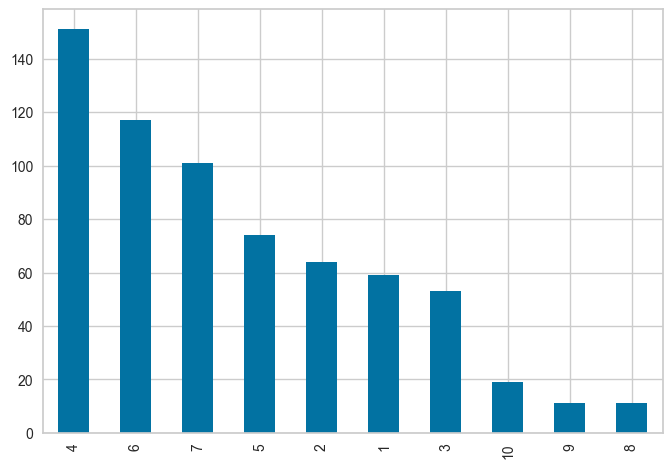

In [94]:
df_use['Total_Credit_Cards'].value_counts().plot(kind='bar')

<AxesSubplot: >

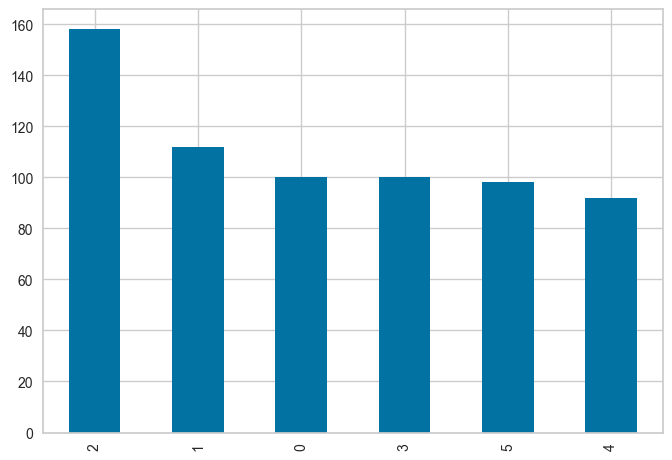

In [95]:
df_use['Total_visits_bank'].value_counts().plot(kind='bar')

<AxesSubplot: >

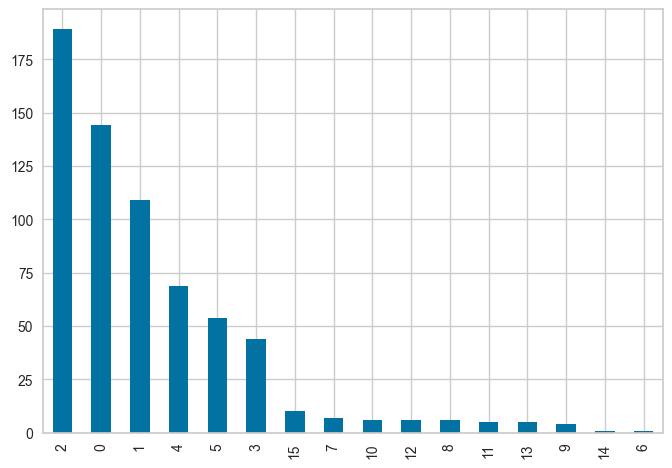

In [96]:
df_use['Total_visits_online'].value_counts().plot(kind='bar')

<AxesSubplot: >

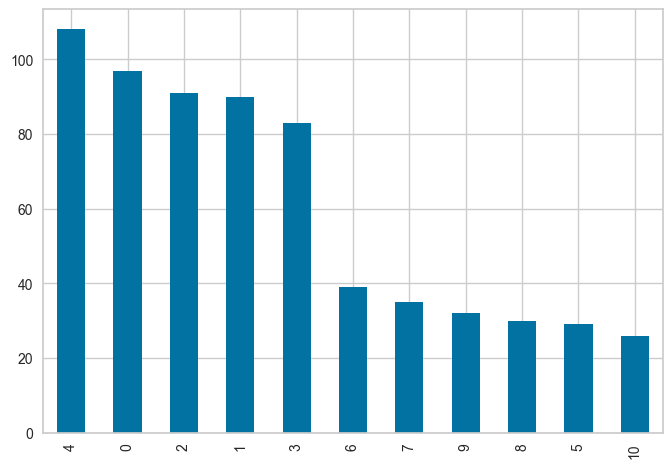

In [97]:
df_use['Total_calls_made'].value_counts().plot(kind='bar')

In [427]:
df_use.iloc[:, :-2]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


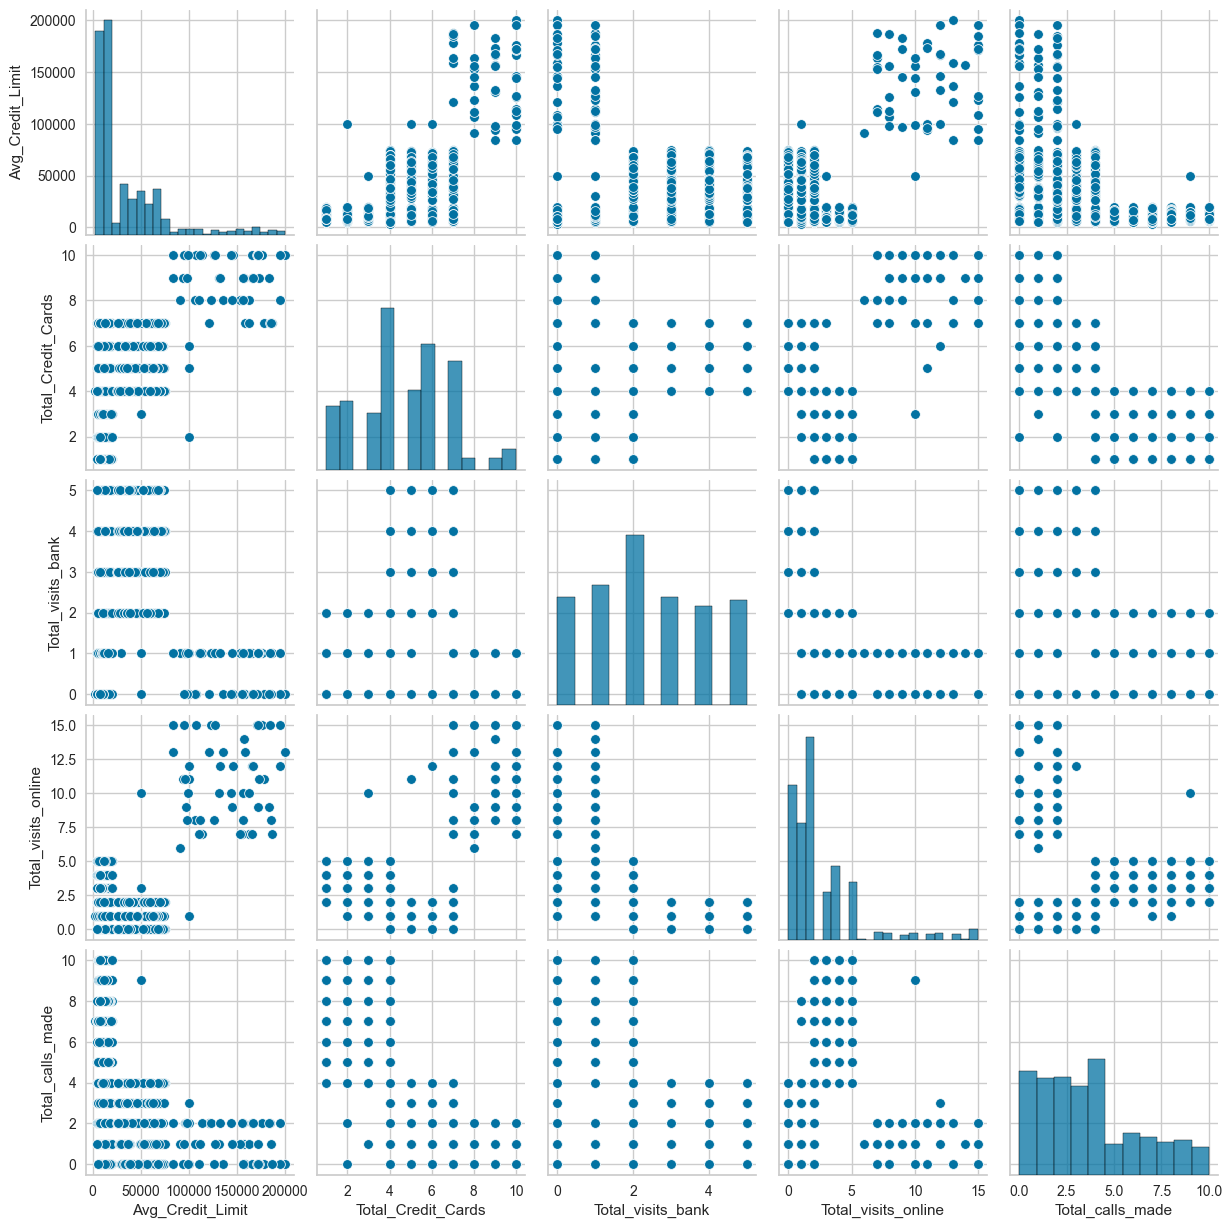

In [428]:
sns.pairplot(df_use.iloc[:, :-2])
# plt.savefig('original_pairplot_without_groups.svg')

# Scaling and Clustering
Here I will scale and cluster the data using KMeans clustering

In [101]:
X = df_use.copy()

Checking the intertia of different groups

In [103]:
inertia_dict = {'clusters': [], 'inertia':[]}

for i in range(2,11):
    scaler = StandardScaler()
    cluster = KMeans(n_clusters=i)
    pipe = make_pipeline(scaler, cluster)

    pipe.fit(X)

    inertia_dict['clusters'].append(i)
    inertia_dict['inertia'].append(pipe['kmeans'].inertia_)

inertia_df = pd.DataFrame(inertia_dict)

<AxesSubplot: xlabel='clusters', ylabel='inertia'>

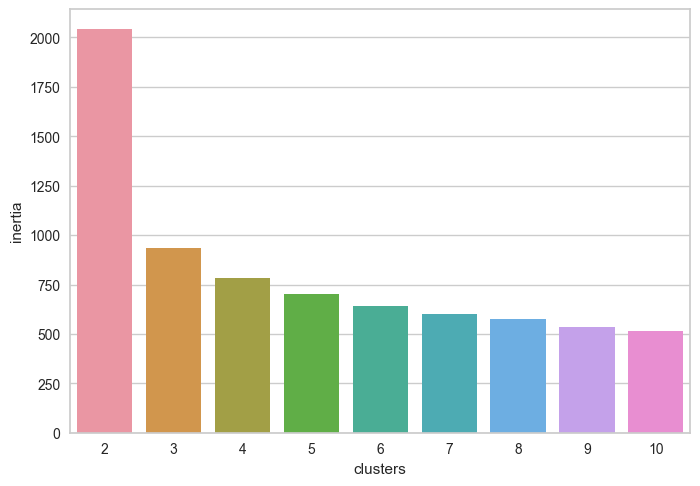

In [104]:
sns.barplot(data=inertia_df, x='clusters', y='inertia')

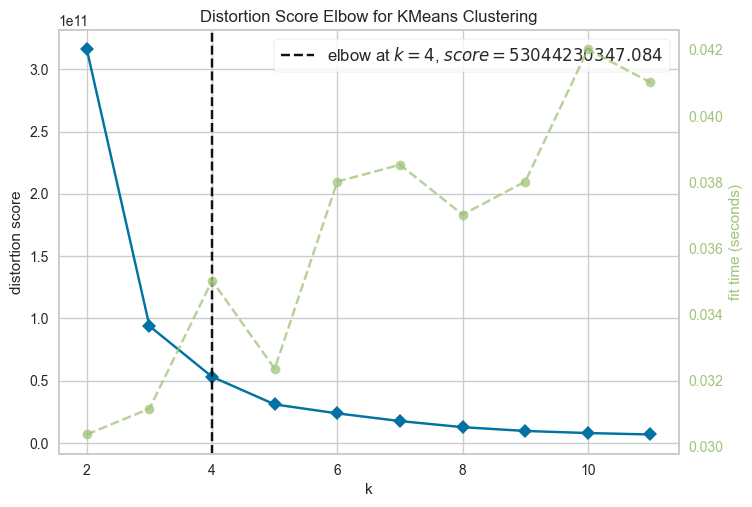

<Figure size 800x550 with 0 Axes>

In [415]:
visualizer = KElbowVisualizer(pipe['kmeans'], k=(2,12))

visualizer.fit(X)
visualizer.show()

plt.savefig('elbow_graph.svg')
plt.show()

The Elbow is at four clusters, however, based on the pairplot I think three groups will be more fitting

In [108]:
scaler = StandardScaler()
cluster = KMeans(n_clusters=3)

pipe = make_pipeline(scaler, cluster)
pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [109]:
len(pipe['kmeans'].labels_)

660

In [112]:
df_use['labels'] = pd.Series(pipe['kmeans'].labels_)

In [111]:
# Save the clustered labels since we are arbitrarily placing the original centroids
# and could get different "labels" in the next iteration of the clustering

df.to_csv('credit_card_cust_clustered.csv', index=False)

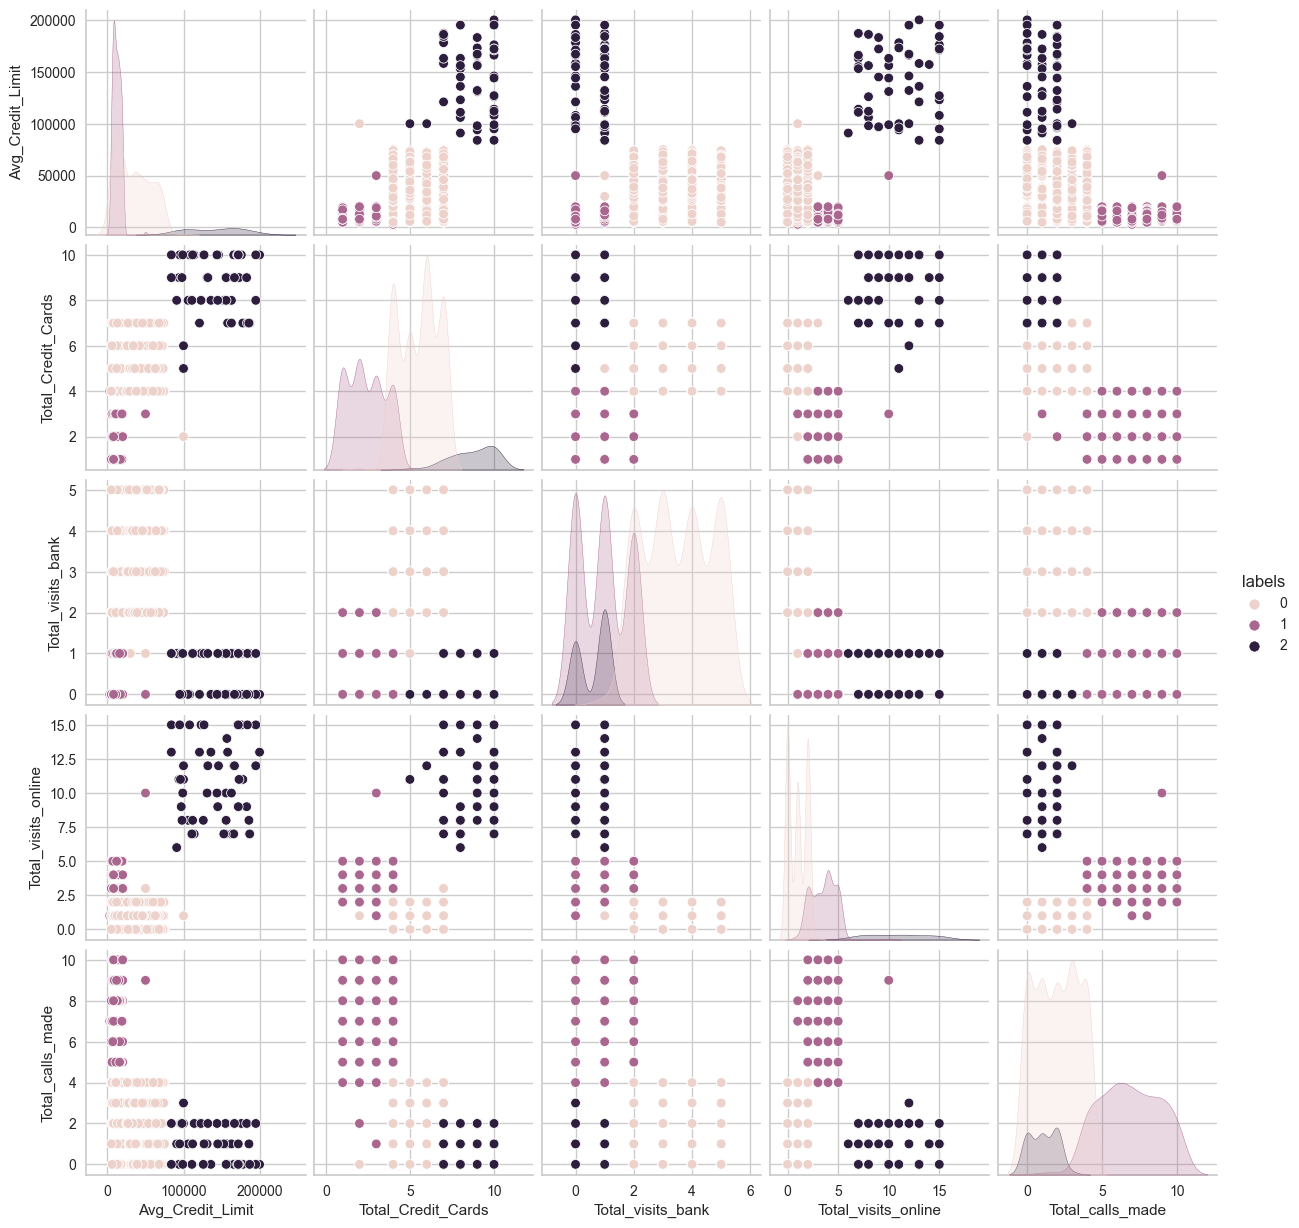

In [412]:
# Rerun the pairplot but using the labels as the hues

sns.pairplot(df_use, hue='labels')
# plt.savefig('pairplot_with_groups.svg')

In [115]:
df_use.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made', 'labels'],
      dtype='object')

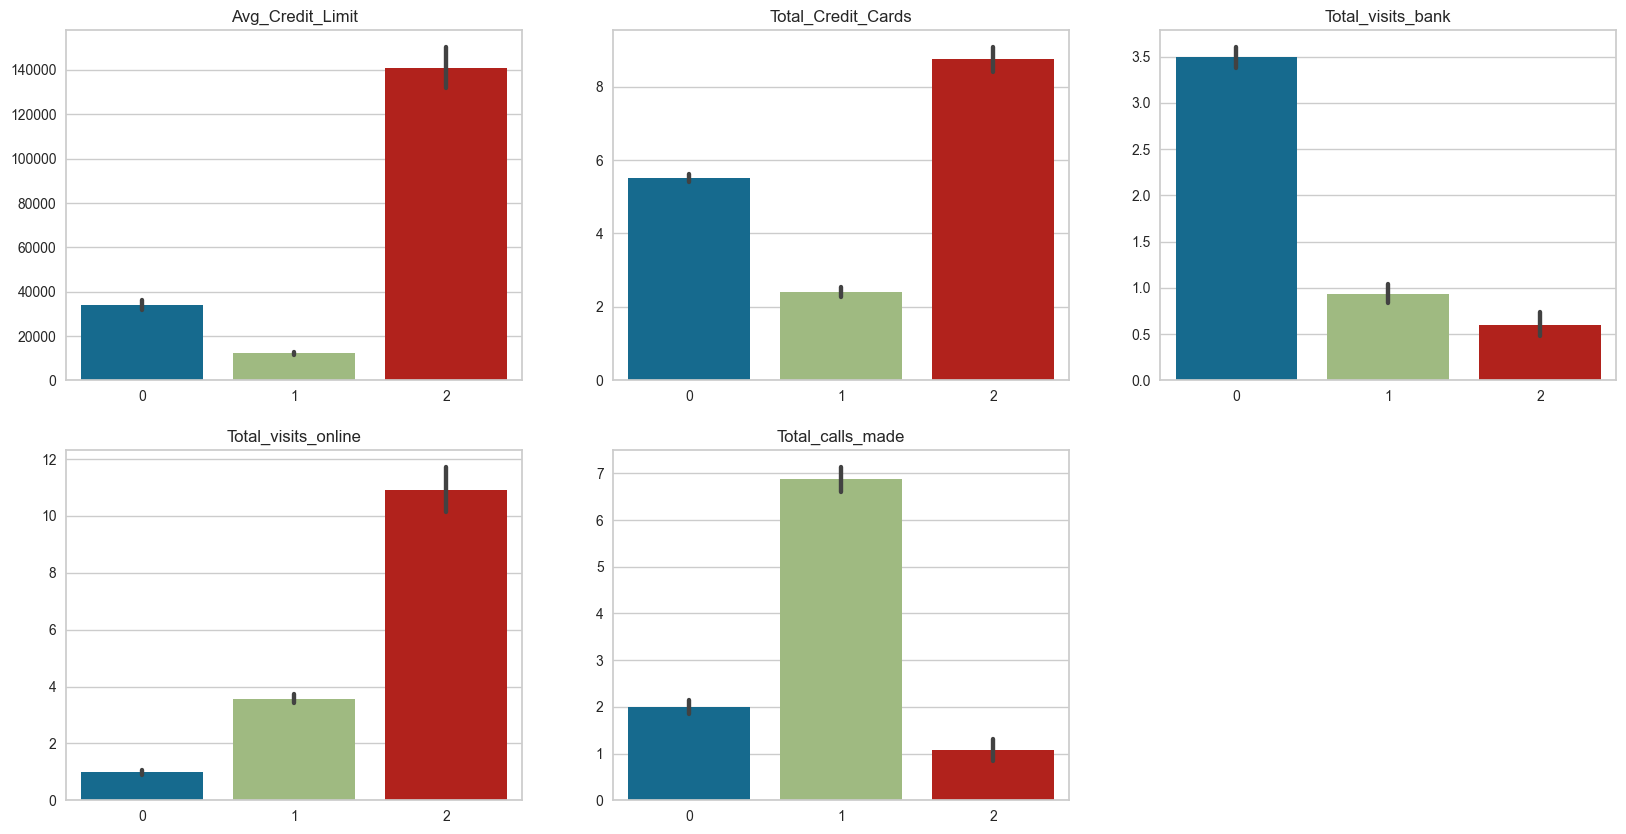

In [411]:
import math

var_list = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

rows = math.ceil(len(var_list)/3)

fig, axs = plt.subplots(rows, 3, figsize=(20,5*rows))

for i, ax in zip(var_list, axs.flat):
    g = sns.barplot(data=df_use, x='labels', y=i, ax=ax)
    ax.set(xlabel="", ylabel="", title=i)

for i in axs.flat[::-1][:rows*3-len(var_list)]:
    i.set_axis_off()

plt.savefig('bar_comparison.svg')
plt.show()

In [338]:
renames = {
    0: "old_school",
    1: "low_credit_high_call",
    2: "rich_credit_card_exploiters"
}

In [339]:
df_use['Group'] = df_use['labels'].map(renames) # Map the names of the groups to each row

In [340]:
# Once again back it up
df_use.to_csv('credit_card_groups_done.csv')

In [341]:
df_use.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made', 'labels', 'Group'],
      dtype='object')

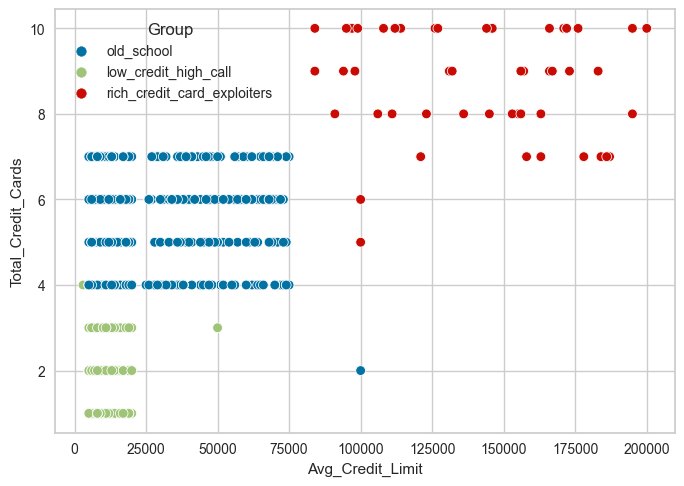

In [410]:
sns.scatterplot(data=df_use, x='Avg_Credit_Limit', y='Total_Credit_Cards', hue='Group')
# plt.savefig('avg_limit_vs_total_credit_cards.svg')

<AxesSubplot: xlabel='Avg_Credit_Limit', ylabel='Total_calls_made'>

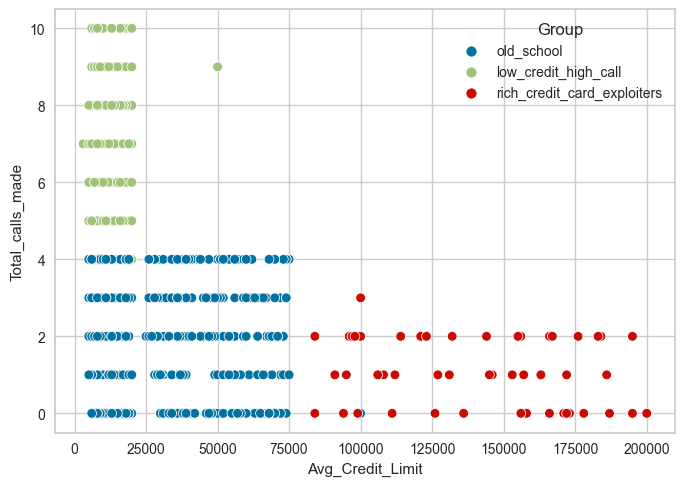

In [343]:
sns.scatterplot(data=df_use, x='Avg_Credit_Limit', y='Total_calls_made', hue='Group')

<AxesSubplot: xlabel='Avg_Credit_Limit', ylabel='Total_visits_online'>

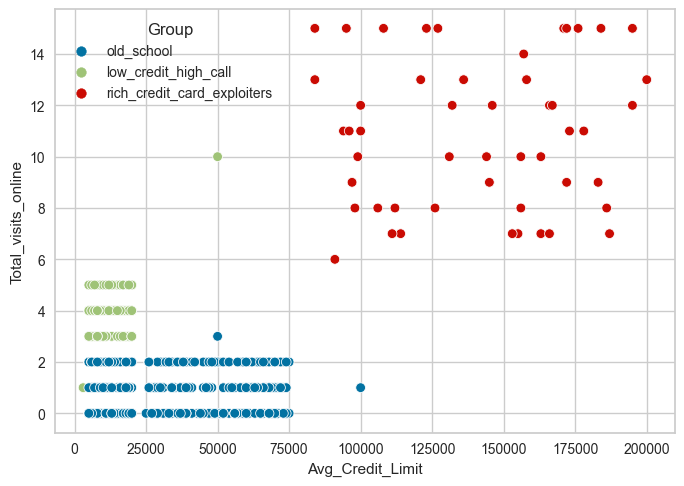

In [344]:
sns.scatterplot(data=df_use, x='Avg_Credit_Limit', y='Total_visits_online', hue='Group')

<AxesSubplot: xlabel='Avg_Credit_Limit', ylabel='Density'>

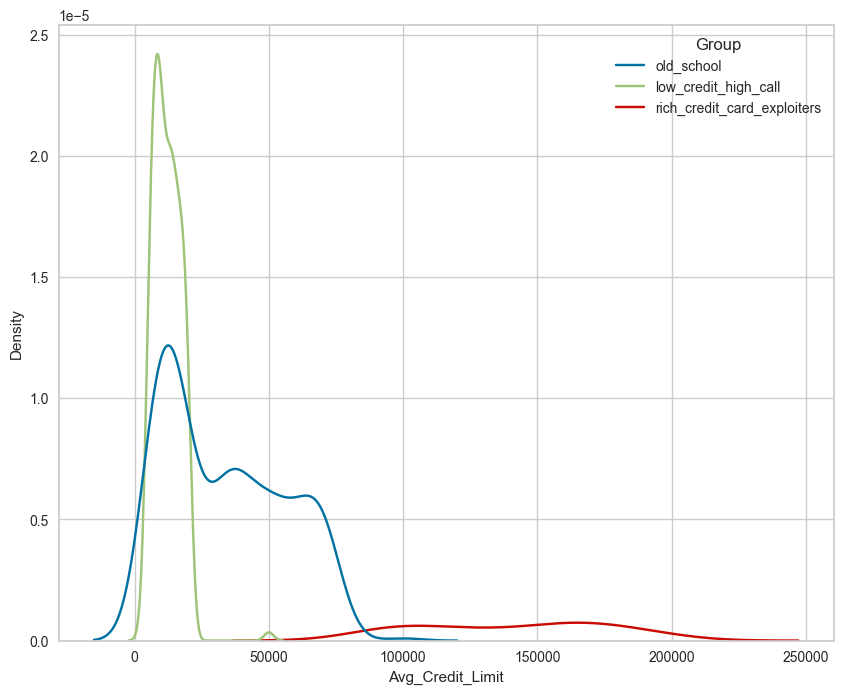

In [345]:
plt.figure(figsize=(10,8))
sns.kdeplot(data=df_use, x='Avg_Credit_Limit', hue='Group')

<AxesSubplot: xlabel='Avg_Credit_Limit', ylabel='Count'>

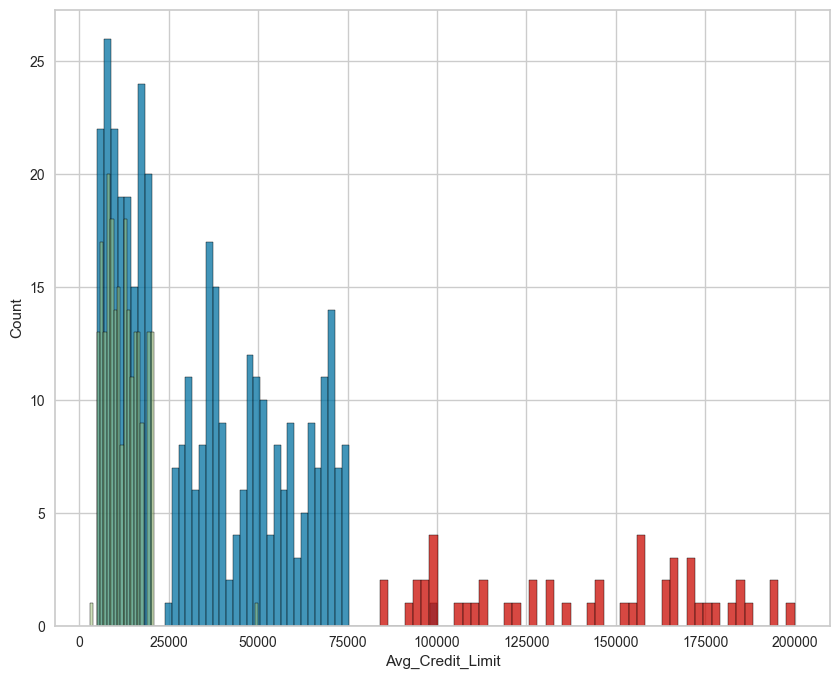

In [346]:
plt.figure(figsize=(10,8))

sns.histplot(data=df_use[df_use['Group'] == 'old_school'], x='Avg_Credit_Limit', bins=50)
sns.histplot(data=df_use[df_use['Group'] == 'low_credit_high_call'], x='Avg_Credit_Limit', bins=50, alpha = 0.5)
sns.histplot(data=df_use[df_use['Group'] == 'rich_credit_card_exploiters'], x='Avg_Credit_Limit', bins=50)

In [347]:
df_use.groupby('Group').mean().round().T.iloc[:-1]

Group,low_credit_high_call,old_school,rich_credit_card_exploiters
Avg_Credit_Limit,12174.0,33782.0,141040.0
Total_Credit_Cards,2.0,6.0,9.0
Total_visits_bank,1.0,3.0,1.0
Total_visits_online,4.0,1.0,11.0
Total_calls_made,7.0,2.0,1.0


In [348]:
from mpl_toolkits import mplot3d

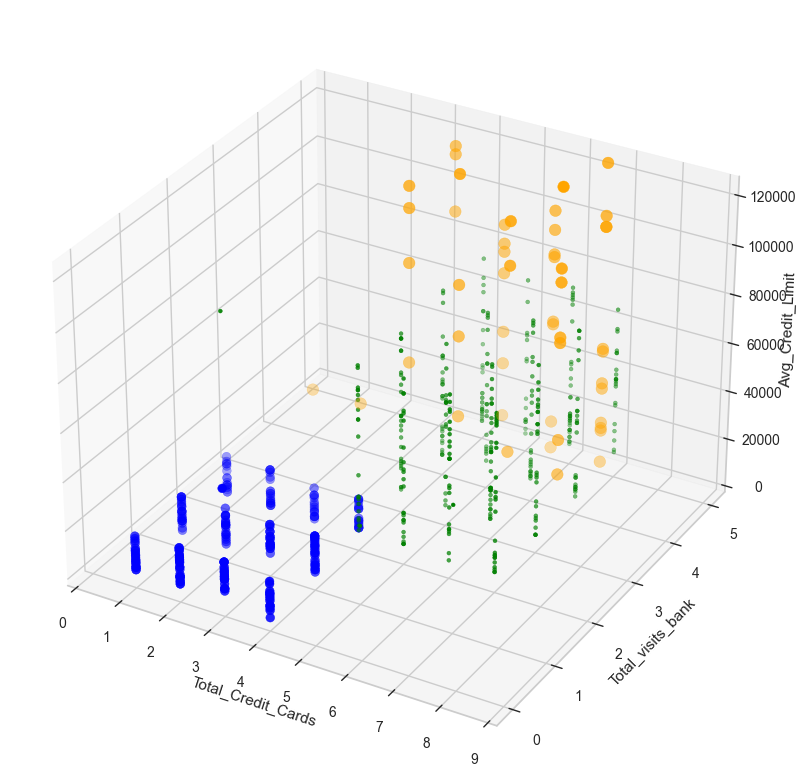

In [409]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

## Old School
z_os = df_use.loc[df_use['Group'] == 'old_school']['Avg_Credit_Limit']
x_os = df_use.loc[df_use['Group'] == 'old_school']['Total_Credit_Cards']
y_os = df_use.loc[df_use['Group'] == 'old_school']['Total_visits_bank']

z_npp = df_use.loc[df_use['Group'] == 'low_credit_high_call']['Avg_Credit_Limit']
x_npp = df_use.loc[df_use['Group'] == 'low_credit_high_call']['Total_Credit_Cards']
y_npp = df_use.loc[df_use['Group'] == 'low_credit_high_call']['Total_visits_bank']

z_r = df_use.loc[df_use['Group'] == 'rich_credit_card_exploiters']['Avg_Credit_Limit']
x_r = df_use.loc[df_use['Group'] == 'rich_credit_card_exploiters']['Total_Credit_Cards']
y_r = df_use.loc[df_use['Group'] == 'rich_credit_card_exploiters']['Total_visits_bank']


ax.scatter3D(x_os, y_os, z_os, c="green", s=8);
ax.scatter3D(x_npp, y_npp, z_npp, c="blue", s=40)
ax.scatter3D(x_r, y_r, z_r, c="orange", s=70)

ax.set_xlim(0,9)
ax.set_zlim(0,125000)

ax.set_xlabel('Total_Credit_Cards')
ax.set_ylabel('Total_visits_bank')
ax.set_zlabel('Avg_Credit_Limit')

plt.tight_layout()
# plt.savefig('Orgininal_3d.svg')

In [350]:
scaler = StandardScaler()
decomp = PCA()

pipe = make_pipeline(scaler, decomp)

pipe.fit(df_use.iloc[:, :-2])

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [351]:
pipe['pca'].explained_variance_ratio_

array([0.45736578, 0.37426483, 0.06401348, 0.0555688 , 0.04878711])

In [352]:
values = pipe[:2].transform(X)

cols = [f"PC{idx+1}" for idx, i in enumerate(values.T)]


In [353]:
pd.DataFrame(values, columns=cols)

,PC1,PC2,PC3,PC4,PC5
0,0.501291,0.524829,1.895862,1.200582,-1.277831
1,-1.459560,3.105588,-0.906802,0.411052,0.355547
2,0.525795,0.823979,0.089030,-1.033119,-0.196693
3,-0.362294,0.128123,0.558215,-0.729885,-0.320163
4,1.266228,3.668708,-0.099999,0.505571,0.724437
...,...,...,...,...,...
655,3.038539,2.666249,-0.092289,-0.568711,0.946140
656,2.567247,3.341750,-0.873793,-0.530812,1.580469
657,2.851444,2.983081,0.044888,0.302533,-0.347817
658,4.178258,4.582930,-0.605336,0.573188,0.578235


In [354]:
df_with_pca = df_use.join(pd.DataFrame(values, columns=cols)).copy()

In [355]:
df_with_pca.to_csv('cc_with_pca.csv')

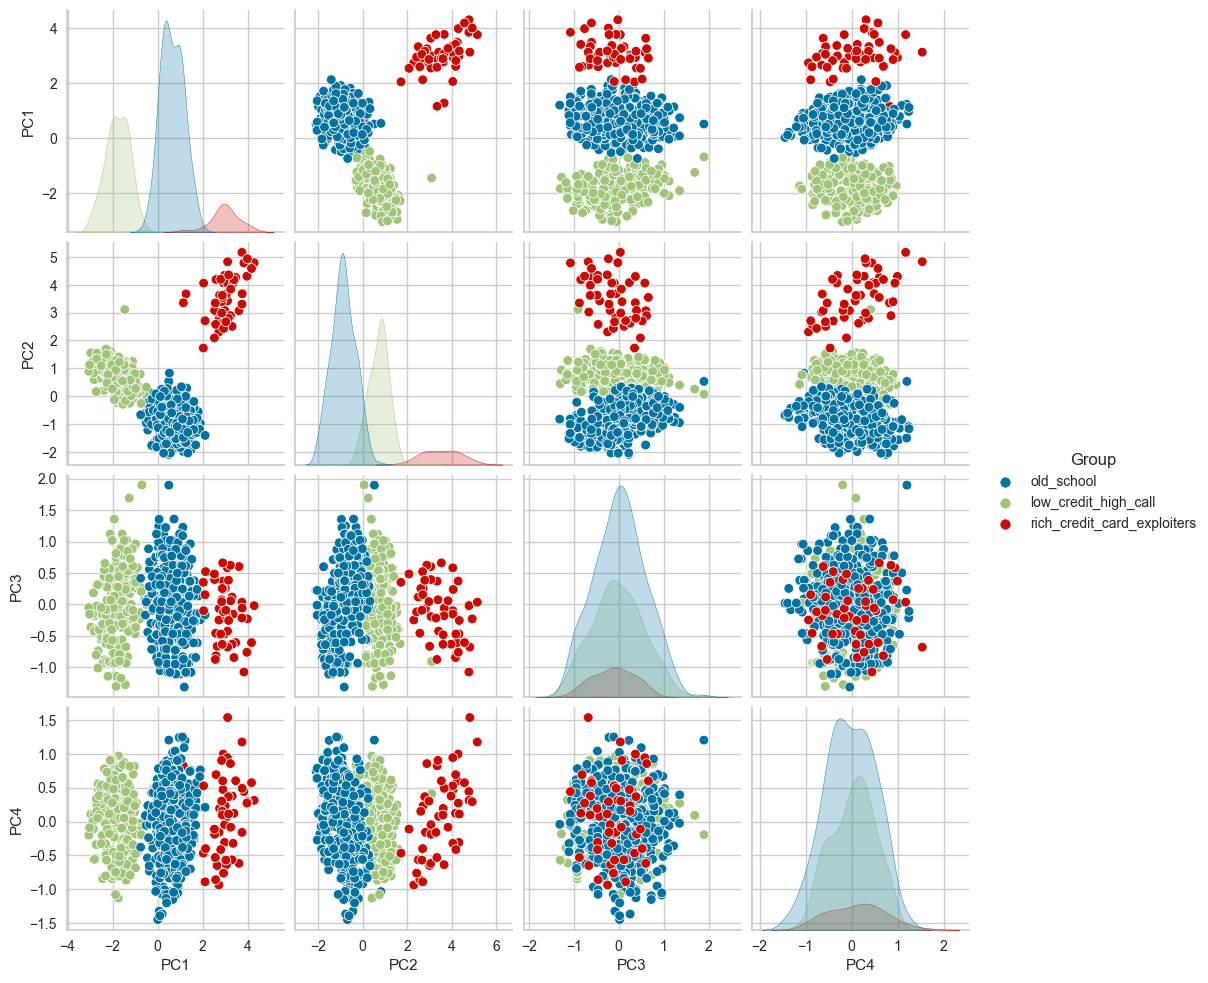

In [383]:
sns.pairplot(df_with_pca.iloc[:, -6:-1], hue='Group')
plt.savefig('test.svg')

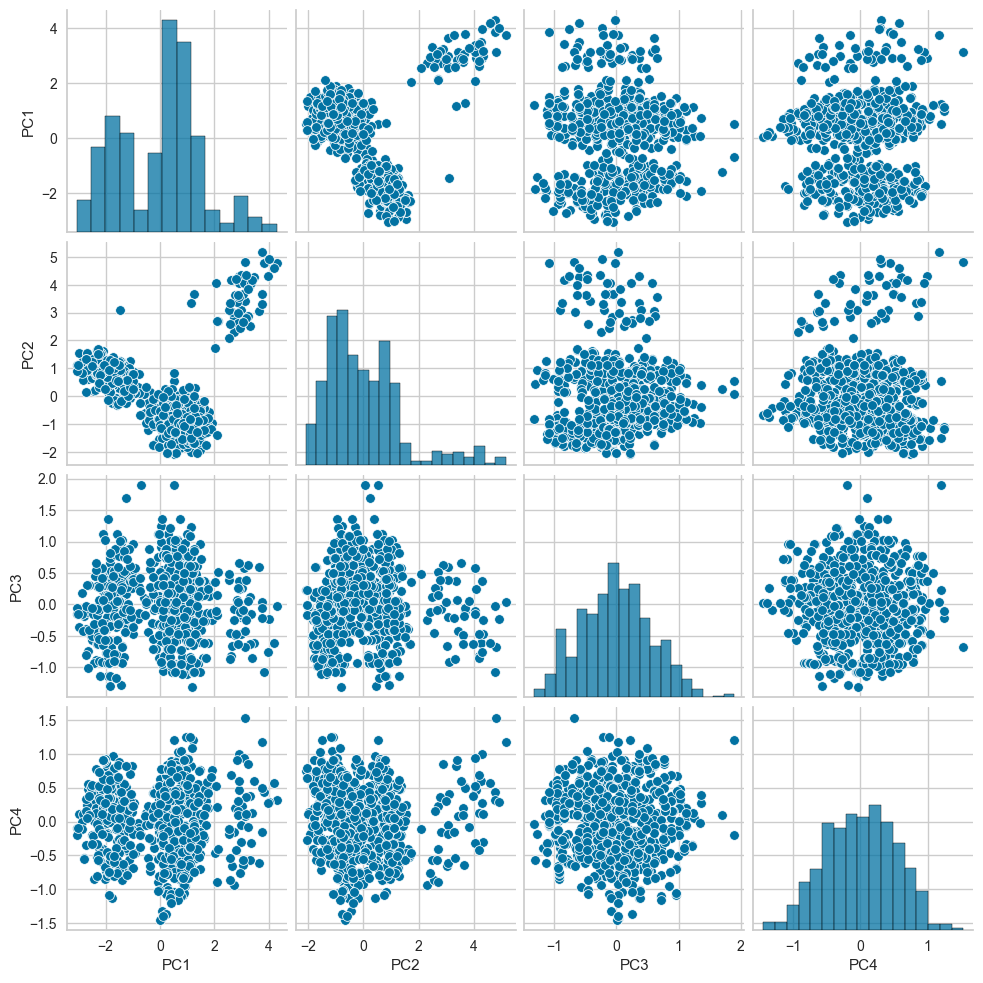

In [384]:
sns.pairplot(df_with_pca.iloc[:, -6:-1])
plt.savefig('test2.svg')

In [357]:
df_with_pca

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels,Group,PC1,PC2,PC3,PC4,PC5
0,100000,2,1,1,0,0,old_school,0.501291,0.524829,1.895862,1.200582,-1.277831
1,50000,3,0,10,9,1,low_credit_high_call,-1.459560,3.105588,-0.906802,0.411052,0.355547
2,50000,7,1,3,4,0,old_school,0.525795,0.823979,0.089030,-1.033119,-0.196693
3,30000,5,1,1,4,0,old_school,-0.362294,0.128123,0.558215,-0.729885,-0.320163
4,100000,6,0,12,3,2,rich_credit_card_exploiters,1.266228,3.668708,-0.099999,0.505571,0.724437
...,...,...,...,...,...,...,...,...,...,...,...,...
655,99000,10,1,10,0,2,rich_credit_card_exploiters,3.038539,2.666249,-0.092289,-0.568711,0.946140
656,84000,10,1,13,2,2,rich_credit_card_exploiters,2.567247,3.341750,-0.873793,-0.530812,1.580469
657,145000,8,1,9,1,2,rich_credit_card_exploiters,2.851444,2.983081,0.044888,0.302533,-0.347817
658,172000,10,1,15,0,2,rich_credit_card_exploiters,4.178258,4.582930,-0.605336,0.573188,0.578235


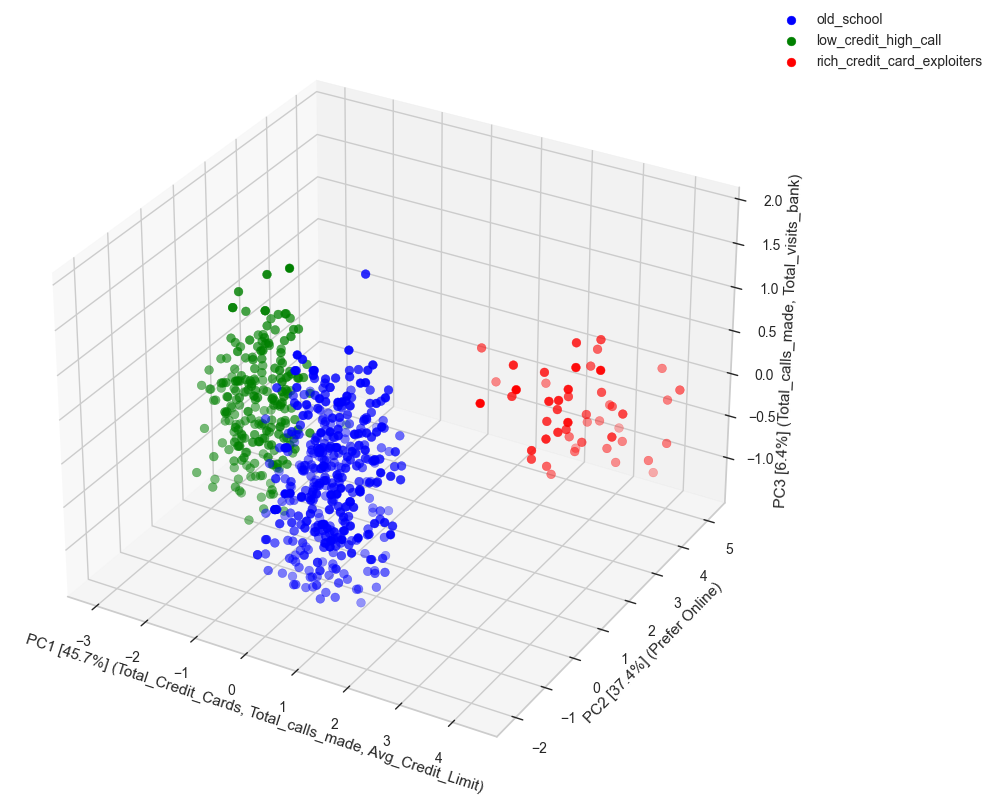

In [408]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

## Old School
x_os = df_with_pca.loc[df_with_pca['Group'] == 'old_school']['PC1']
y_os = df_with_pca.loc[df_with_pca['Group'] == 'old_school']['PC2']
z_os = df_with_pca.loc[df_with_pca['Group'] == 'old_school']['PC3']

x_npp = df_with_pca.loc[df_with_pca['Group'] == 'low_credit_high_call']['PC1']
y_npp = df_with_pca.loc[df_with_pca['Group'] == 'low_credit_high_call']['PC2']
z_npp = df_with_pca.loc[df_with_pca['Group'] == 'low_credit_high_call']['PC3']

x_r = df_with_pca.loc[df_with_pca['Group'] == 'rich_credit_card_exploiters']['PC1']
y_r = df_with_pca.loc[df_with_pca['Group'] == 'rich_credit_card_exploiters']['PC2']
z_r = df_with_pca.loc[df_with_pca['Group'] == 'rich_credit_card_exploiters']['PC3']


ax.scatter3D(x_os, y_os, z_os, c="blue", s=40, label='old_school');
ax.scatter3D(x_npp, y_npp, z_npp, c="green", s=40, label='low_credit_high_call')
ax.scatter3D(x_r, y_r, z_r, c="red", s=40, label='rich_credit_card_exploiters')

ax.set_xlabel('PC1 [45.7%] (Total_Credit_Cards, Total_calls_made, Avg_Credit_Limit)')
ax.set_ylabel('PC2 [37.4%] (Prefer Online)')
ax.set_zlabel('PC3 [6.4%] (Total_calls_made, Total_visits_bank)')

fig.legend()
plt.tight_layout()
# plt.savefig('PC123_3d.svg')

In [359]:
print(f"The first three components explain {  str(pipe['pca'].explained_variance_ratio_[:3].cumsum()[2]*100)[:5]  }% of the data.")

The first three components explain 89.56% of the data.


In [360]:
components = pd.DataFrame(
    data=pipe['pca'].components_, 
    columns=df_with_pca.columns[:5], 
    index=[f"PC{i}" for i in range( 1, len(df_with_pca.columns[:5]) + 1 )])

components

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
PC1,0.488859,0.597679,0.280492,0.111783,-0.559129
PC2,0.403240,0.030171,-0.586587,0.665161,0.223527
PC3,0.003461,-0.284983,-0.613522,-0.304948,-0.670351
PC4,0.308617,-0.741352,0.445278,0.318388,-0.235605
PC5,-0.709337,0.105122,0.050586,0.592200,-0.364047


In [361]:
df_with_pca

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels,Group,PC1,PC2,PC3,PC4,PC5
0,100000,2,1,1,0,0,old_school,0.501291,0.524829,1.895862,1.200582,-1.277831
1,50000,3,0,10,9,1,low_credit_high_call,-1.459560,3.105588,-0.906802,0.411052,0.355547
2,50000,7,1,3,4,0,old_school,0.525795,0.823979,0.089030,-1.033119,-0.196693
3,30000,5,1,1,4,0,old_school,-0.362294,0.128123,0.558215,-0.729885,-0.320163
4,100000,6,0,12,3,2,rich_credit_card_exploiters,1.266228,3.668708,-0.099999,0.505571,0.724437
...,...,...,...,...,...,...,...,...,...,...,...,...
655,99000,10,1,10,0,2,rich_credit_card_exploiters,3.038539,2.666249,-0.092289,-0.568711,0.946140
656,84000,10,1,13,2,2,rich_credit_card_exploiters,2.567247,3.341750,-0.873793,-0.530812,1.580469
657,145000,8,1,9,1,2,rich_credit_card_exploiters,2.851444,2.983081,0.044888,0.302533,-0.347817
658,172000,10,1,15,0,2,rich_credit_card_exploiters,4.178258,4.582930,-0.605336,0.573188,0.578235


In [362]:
# Not sure that we are mathematically allowed to do this, but imma go for it.

for idx, i in enumerate(abs(pipe['pca'].components_)):
    dct = {
        "Avg_Credit_Limit": i[0]/sum(i),
        "Total_Credit_Cards": i[1]/sum(i),
        "Total_visits_bank": i[2]/sum(i),
        "Total_visits_online": i[3]/sum(i),
        "Total_calls_made": i[4]/sum(i)
    }
    print(f"PC{idx+1}", "\n", dct, "\n")

PC1 
 {'Avg_Credit_Limit': 0.23987874168120862, 'Total_Credit_Cards': 0.29327594538970475, 'Total_visits_bank': 0.13763504498019083, 'Total_visits_online': 0.05485083841775418, 'Total_calls_made': 0.2743594295311417} 

PC2 
 {'Avg_Credit_Limit': 0.2112655938729317, 'Total_Credit_Cards': 0.01580723004978466, 'Total_visits_bank': 0.3073249021031449, 'Total_visits_online': 0.3484916997262071, 'Total_calls_made': 0.11711057424793159} 

PC3 
 {'Avg_Credit_Limit': 0.0018438872670625567, 'Total_Credit_Cards': 0.15180749120151266, 'Total_visits_bank': 0.3268168413398144, 'Total_visits_online': 0.1624427341523352, 'Total_calls_made': 0.3570890460392751} 

PC4 
 {'Avg_Credit_Limit': 0.15060051053840404, 'Total_Credit_Cards': 0.3617694185440843, 'Total_visits_bank': 0.2172892127228366, 'Total_visits_online': 0.15536871133372251, 'Total_calls_made': 0.11497214686095245} 

PC5 
 {'Avg_Credit_Limit': 0.38946877112445377, 'Total_Credit_Cards': 0.057718538595530916, 'Total_visits_bank': 0.027774823973

In [385]:
pipe['pca'].components_

array([[ 0.48885901,  0.59767943,  0.28049227,  0.11178284, -0.55912866],
       [ 0.40323959,  0.03017103, -0.58658661,  0.66516108,  0.22352726],
       [ 0.00346147, -0.28498293, -0.6135219 , -0.3049481 , -0.67035086],
       [ 0.30861651, -0.74135216,  0.44527763,  0.31838769, -0.23560546],
       [-0.70933671,  0.10512237,  0.05058609,  0.59220036, -0.36404738]])

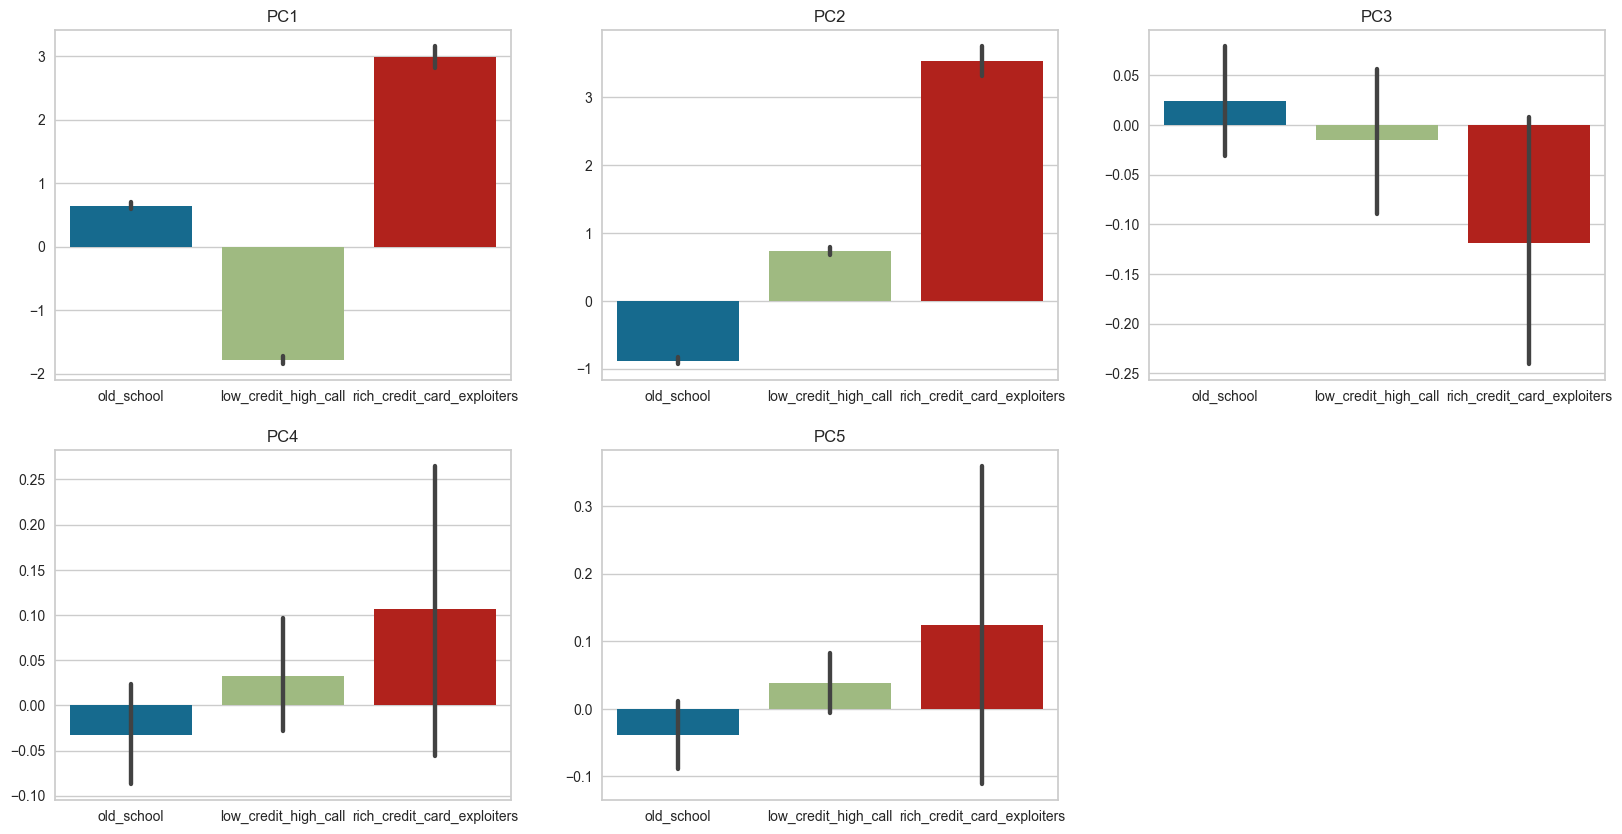

In [364]:
import math

var_list = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

rows = math.ceil(len(var_list)/3)

fig, axs = plt.subplots(rows, 3, figsize=(20,5*rows))

for i, ax in zip(var_list, axs.flat):
    g = sns.barplot(data=df_with_pca, x='Group', y=i, ax=ax)
    ax.set(xlabel="", ylabel="", title=i)

for i in axs.flat[::-1][:rows*3-len(var_list)]:
    i.set_axis_off()

plt.show()

### HARD TO INTERPRET!

In [401]:
pipe['pca'].components_

array([[ 0.48885901,  0.59767943,  0.28049227,  0.11178284, -0.55912866],
       [ 0.40323959,  0.03017103, -0.58658661,  0.66516108,  0.22352726],
       [ 0.00346147, -0.28498293, -0.6135219 , -0.3049481 , -0.67035086],
       [ 0.30861651, -0.74135216,  0.44527763,  0.31838769, -0.23560546],
       [-0.70933671,  0.10512237,  0.05058609,  0.59220036, -0.36404738]])

In [366]:
[i/sum(i) for i in abs(pipe['pca'].components_)]

[array([0.23987874, 0.29327595, 0.13763504, 0.05485084, 0.27435943]),
 array([0.21126559, 0.01580723, 0.3073249 , 0.3484917 , 0.11711057]),
 array([0.00184389, 0.15180749, 0.32681684, 0.16244273, 0.35708905]),
 array([0.15060051, 0.36176942, 0.21728921, 0.15536871, 0.11497215]),
 array([0.38946877, 0.05771854, 0.02777482, 0.32515383, 0.19988404])]

In [367]:
components_pct = pd.DataFrame(
    data=[(i/sum(i)).round(4) for i in abs(pipe['pca'].components_)], 
    columns=df_with_pca.columns[:5], 
    index=[f"PC{i}" for i in range( 1, len(df_with_pca.columns[:5]) + 1 )])


components_pct = components_pct.applymap(lambda x: f"{str(round(x*100, 1))}%")

components_pct['explained_variance_ratio'] = pipe['pca'].explained_variance_ratio_

components_pct['explained_variance_ratio_cumsum'] = pipe['pca'].explained_variance_ratio_.cumsum()

components_pct

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,explained_variance_ratio,explained_variance_ratio_cumsum
PC1,24.0%,29.3%,13.8%,5.5%,27.4%,0.457366,0.457366
PC2,21.1%,1.6%,30.7%,34.8%,11.7%,0.374265,0.831631
PC3,0.2%,15.2%,32.7%,16.2%,35.7%,0.064013,0.895644
PC4,15.1%,36.2%,21.7%,15.5%,11.5%,0.055569,0.951213
PC5,39.0%,5.8%,2.8%,32.5%,20.0%,0.048787,1.000000


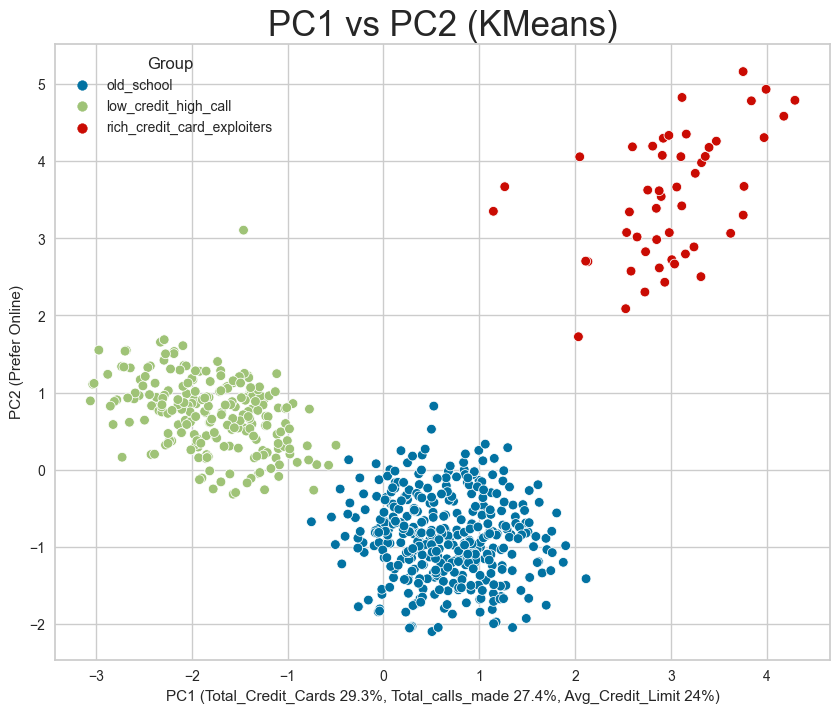

In [407]:
plt.figure(figsize=(10,8))

sns.scatterplot(data=df_with_pca, x='PC1', y='PC2', hue='Group')

plt.ylabel('PC2 (Prefer Online)')
plt.xlabel('PC1 (Total_Credit_Cards 29.3%, Total_calls_made 27.4%, Avg_Credit_Limit 24%)')

plt.title('PC1 vs PC2 (KMeans)', fontsize=25)
plt.savefig('PC1vsPC2.svg')

<AxesSubplot: xlabel='Total_calls_made', ylabel='Total_Credit_Cards'>

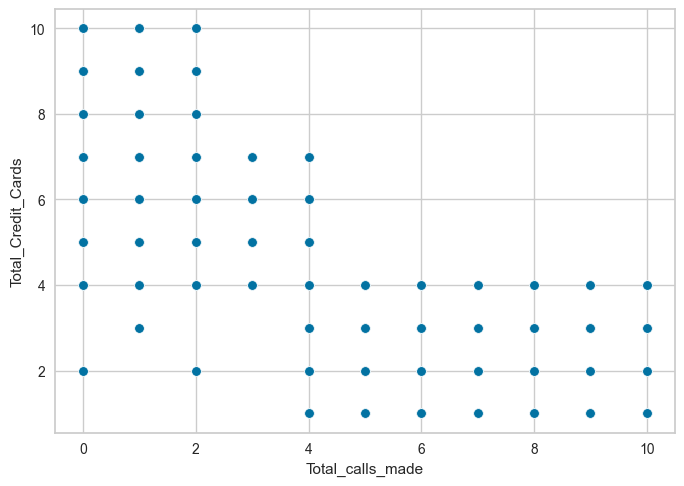

In [402]:
sns.scatterplot(df_with_pca, x='Total_calls_made', y='Total_Credit_Cards')

In [417]:
os.chdir(r'C:\Users\maxdi\Dropbox\Python\python_projects\BC#4\Clustering_Project\graphs')

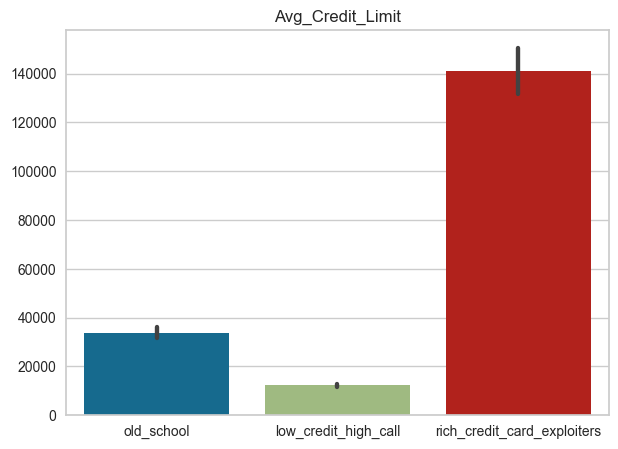

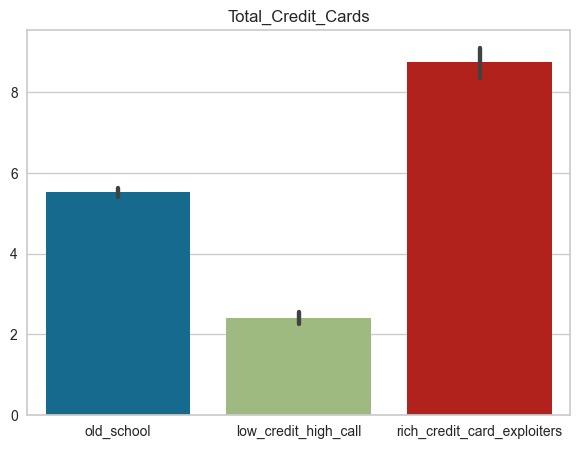

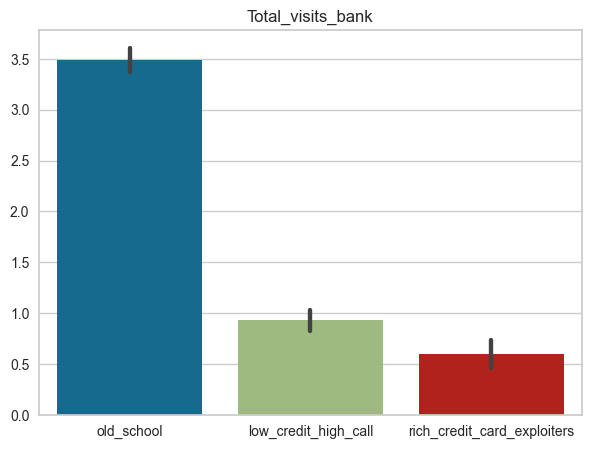

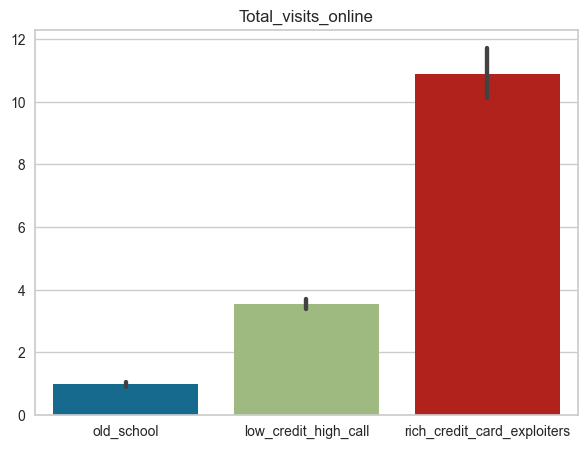

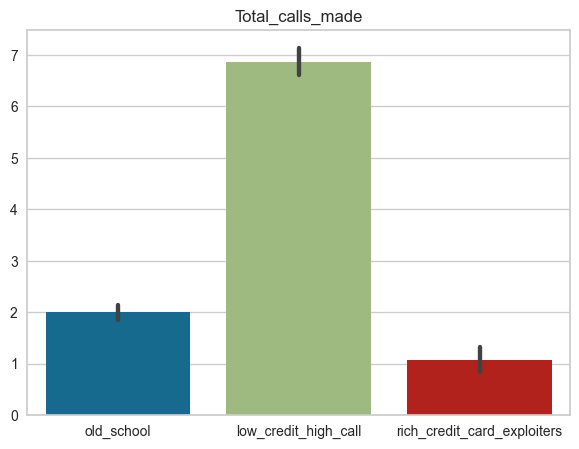

In [420]:

var_list = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']


for i in var_list:
    fig, ax = plt.subplots(1,1, figsize=(7,5))
    g = sns.barplot(data=df_use, x='Group', y=i)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(i)
    plt.savefig(f'{i}.svg')
    plt.show

In [422]:
components.to_csv('components.csv')

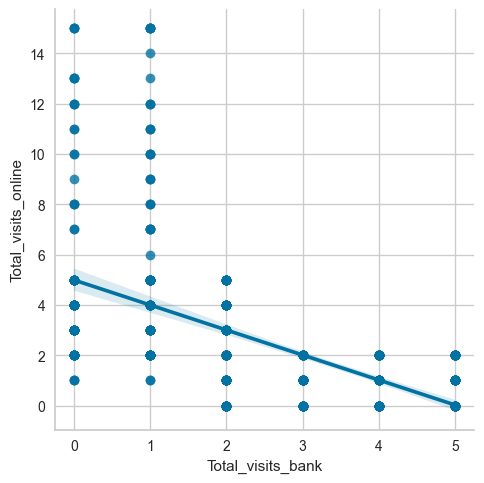

In [430]:
sns.lmplot(data=df_with_pca, x='Total_visits_bank', y='Total_visits_online')

In [431]:
df_with_pca['Total_visits_bank'].corr(df_with_pca['Total_visits_online'])

-0.551861401661099

In [432]:
components

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
PC1,0.488859,0.597679,0.280492,0.111783,-0.559129
PC2,0.403240,0.030171,-0.586587,0.665161,0.223527
PC3,0.003461,-0.284983,-0.613522,-0.304948,-0.670351
PC4,0.308617,-0.741352,0.445278,0.318388,-0.235605
PC5,-0.709337,0.105122,0.050586,0.592200,-0.364047
